In [1]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.drop(["month","day"],axis=1,inplace = True)

In [6]:
df["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:
df.loc[df["size_category"]=='small','size_category']=0
df.loc[df["size_category"]=='large','size_category']=1
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [8]:
X = df.iloc[:,0:28]
Y = df.iloc[:,28]

In [9]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X = SS.fit_transform(X)

In [10]:
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(Dense(42, input_dim=28,  activation='relu')) #input layer
model.add(Dense(42, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) #output layer

In [13]:
model.compile(loss='hinge', optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=8)

Epoch 1/150
44/44 [==============================] - 1s 8ms/step - loss: 1.2162 - accuracy: 0.6301 - val_loss: 1.0896 - val_accuracy: 0.6784
Epoch 2/150
44/44 [==============================] - 0s 3ms/step - loss: 1.0810 - accuracy: 0.7572 - val_loss: 1.0334 - val_accuracy: 0.6784
Epoch 3/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0336 - accuracy: 0.7572 - val_loss: 1.0175 - val_accuracy: 0.6784
Epoch 4/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0184 - accuracy: 0.7572 - val_loss: 1.0110 - val_accuracy: 0.6784
Epoch 5/150
44/44 [==============================] - 0s 3ms/step - loss: 1.0120 - accuracy: 0.7572 - val_loss: 1.0079 - val_accuracy: 0.6784
Epoch 6/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0086 - accuracy: 0.7572 - val_loss: 1.0058 - val_accuracy: 0.6784
Epoch 7/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0065 - accuracy: 0.7572 - val_loss: 1.0045 - val_accuracy: 0.6784
Epoch 8/150
4

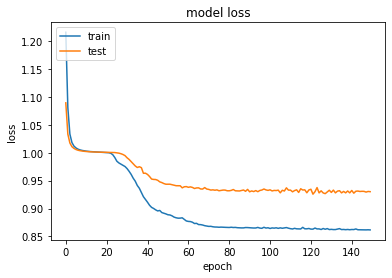

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()